<h3> DECESSI REGISTRATI DALLA RPOTEZIONE CIVILE (dal 24 febrario al 30 giugno) </h3>

In [1]:
import pandas as pd
decessi_covid = pd.read_csv('csv/decessi_covid19_30giugno.csv')
decessi_covid.head()

,data,deceduti
0,2020-02-24,7.0
1,2020-02-25,3.0
2,2020-02-26,2.0
3,2020-02-27,5.0
4,2020-02-28,4.0


In [2]:
decessi_covid.data = pd.to_datetime(decessi_covid.data)
decessi_covid.deceduti = pd.to_numeric(decessi_covid.deceduti)

decessi_covid=decessi_covid.set_index('data')
decessi_covid.head()

,deceduti
data,
2020-02-24,7.0
2020-02-25,3.0
2020-02-26,2.0
2020-02-27,5.0
2020-02-28,4.0


In [3]:
ts_decessi_covid = decessi_covid.deceduti

In [4]:
ts_decessi_covid

data
2020-02-24     7.0
2020-02-25     3.0
2020-02-26     2.0
2020-02-27     5.0
2020-02-28     4.0
              ... 
2020-06-26    30.0
2020-06-27     8.0
2020-06-28    22.0
2020-06-29     6.0
2020-06-30    23.0
Name: deceduti, Length: 128, dtype: float64

<h3> DECESSI REGITRATI DALL'ISTAT IN 7357 COMUNI</h3>

In [5]:
df = pd.read_csv('csv/serie_storica.csv')
df.head()

,DATA,TOTALE
0,2015-01-01,2508
1,2015-01-02,2079
2,2015-01-03,2107
3,2015-01-04,2135
4,2015-01-05,2199


In [6]:
df['DATA'] = pd.to_datetime(df['DATA'])

In [7]:
#PERIODO COVID
df_covid_period = df[df['DATA'] > '2020-02-23']
df_covid_period.head()

,DATA,TOTALE
1880,2020-02-24,1955
1881,2020-02-25,1919
1882,2020-02-26,1875
1883,2020-02-27,1777
1884,2020-02-28,1854


In [8]:
df_covid_period = df_covid_period.set_index('DATA')
df_covid_period.head()

,TOTALE
DATA,
2020-02-24,1955
2020-02-25,1919
2020-02-26,1875
2020-02-27,1777
2020-02-28,1854


In [9]:
ts_covid_period = df_covid_period.TOTALE

In [10]:
ts_covid_period

DATA
2020-02-24    1955
2020-02-25    1919
2020-02-26    1875
2020-02-27    1777
2020-02-28    1854
              ... 
2020-06-26    1541
2020-06-27    1503
2020-06-28    1479
2020-06-29    1548
2020-06-30    1515
Name: TOTALE, Length: 128, dtype: int64

<h3> DECESSI DELLA PREDIZIONE DEL MODELLO APPLICATO</h3>

In [11]:
predictions = pd.read_csv('csv/predictions_daily_ARIMA_7357comuni.csv')

predictions.dropna(inplace=True)
predictions.head()

,Unnamed: 0,0
0,2015-01-01,1974.954129
1,2015-01-02,2934.572258
2,2015-01-03,2619.310093
3,2015-01-04,2580.062039
4,2015-01-05,2587.952230


In [12]:
predictions.rename(columns={'Unnamed: 0': 'Data', '0':'Totale'}, inplace=True)
predictions.dropna(inplace=True)
predictions.head()

,Data,Totale
0,2015-01-01,1974.954129
1,2015-01-02,2934.572258
2,2015-01-03,2619.310093
3,2015-01-04,2580.062039
4,2015-01-05,2587.952230


In [13]:
predictions['Data'] = pd.to_datetime(predictions['Data'])
predictions.Totale = pd.to_numeric(predictions.Totale)

#PERIODO COVID
predictions_covid_period = predictions[predictions['Data'] > '2020-02-23']
predictions_covid_period.head()

,Data,Totale
1880,2020-02-24,1786.378750
1881,2020-02-25,1803.890961
1882,2020-02-26,1796.869879
1883,2020-02-27,1784.272086
1884,2020-02-28,1820.823603


In [14]:
predictions_covid_period = predictions_covid_period.set_index('Data')
predictions_covid_period.head()

,Totale
Data,
2020-02-24,1786.378750
2020-02-25,1803.890961
2020-02-26,1796.869879
2020-02-27,1784.272086
2020-02-28,1820.823603


In [15]:
ts_predictions_covid_period = predictions_covid_period.Totale

In [16]:
ts_predictions_covid_period

Data
2020-02-24    1786.378750
2020-02-25    1803.890961
2020-02-26    1796.869879
2020-02-27    1784.272086
2020-02-28    1820.823603
                 ...     
2020-06-26    1594.958108
2020-06-27    1566.206054
2020-06-28    1543.380241
2020-06-29    1567.719878
2020-06-30    1570.121122
Name: Totale, Length: 128, dtype: float64

<h2> CONFRONTO DELLE SERIE STORICHE DAL 24/02/2020 AL 30/06/2020 su 7357 comuni italiani
    <br />
    (periodo in cui sono stati registrati i decessi COVID-19) </h2>

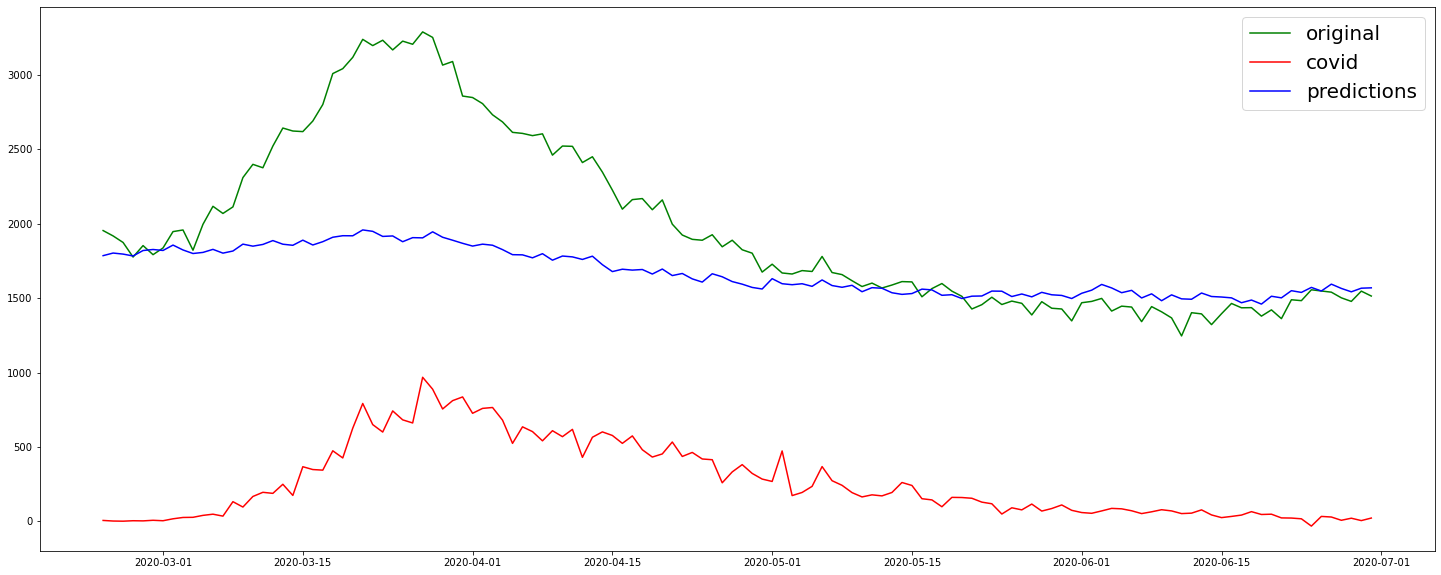

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(25,10))

plt.plot(ts_covid_period, label='original', color='green') #decessi regstrati dall'ISTAT
plt.plot(ts_decessi_covid, label='covid', color='red') #decessi causa covid registrati dalla protezione civile
plt.plot(ts_predictions_covid_period, label='predictions', color='blue') #decessi della predizione del modello

plt.legend(prop={'size': 20})
plt.show()

In [18]:
print('Decessi totali in data 27/03/2020 =', ts_covid_period['2020-03-27'])

Decessi totali in data 27/03/2020 = 3290


In [19]:
print('Decessi COVID19 in data 27/03/2020 =', ts_decessi_covid['2020-03-27'])

Decessi COVID19 in data 27/03/2020 = 969.0


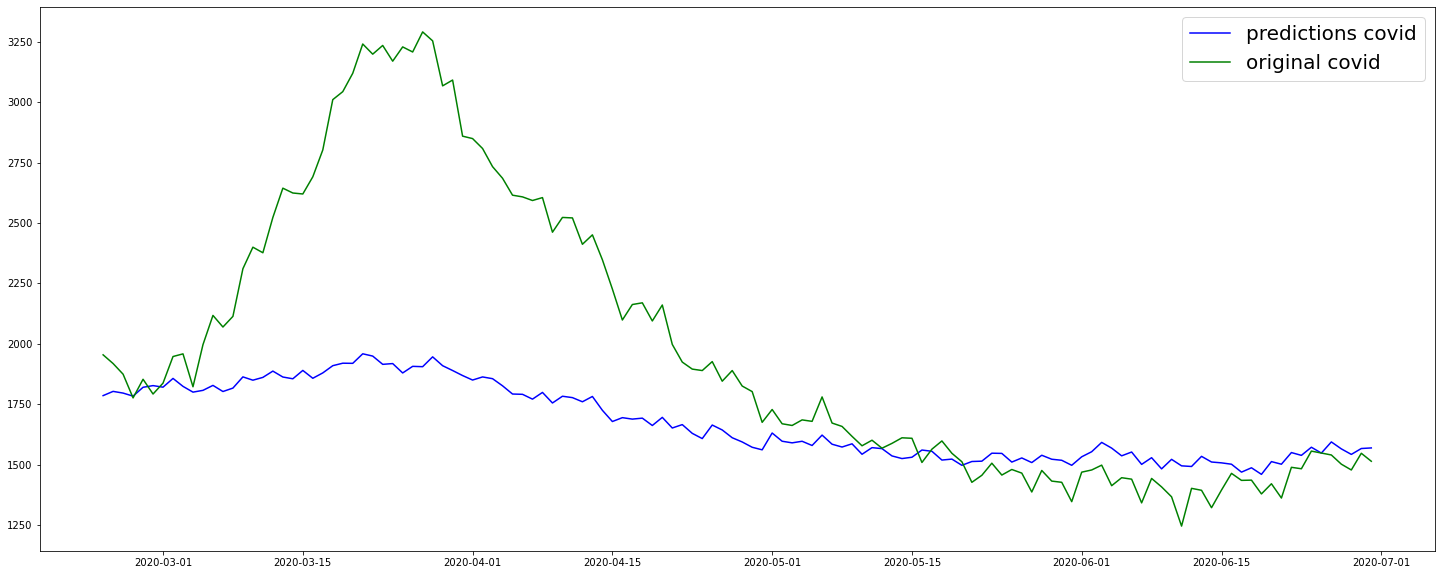

In [20]:
plt.figure(figsize=(25,10))

plt.plot(ts_predictions_covid_period, label='predictions covid', color='blue') #decessi della predizione del modello
plt.plot(ts_covid_period, label='original covid', color='green') #decessi regstrati dall'ISTAT 
plt.legend(prop={'size': 20})
plt.show()

<p> <b>n:</b> decessi covid secondo il modello
    <br />
    <b>ts_covid_period:</b> decessi totali registrati dell'ISAT da febbraio a giugno
    <br />
    <b>ts_predictions_covid_period:</b> decessi previsti dal modello da febbraio a giugno 
</p>

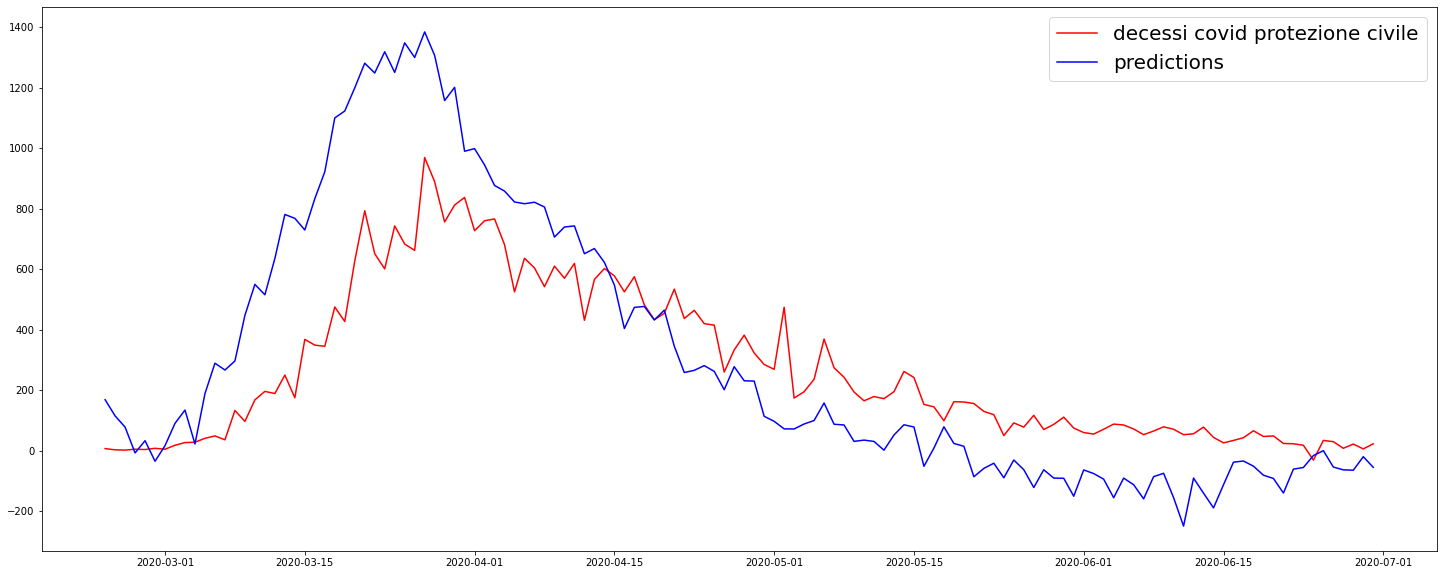

In [21]:
n = ts_covid_period - ts_predictions_covid_period # dati originali - dati del modello

plt.figure(figsize=(25,10))
#decessi causa covid registrati dalla protezione civile
plt.plot(ts_decessi_covid, color='red', label='decessi covid protezione civile')
plt.plot(n, color='blue', label='predictions') #decessi causa covid secondo il modello
plt.legend(prop={'size': 20})
plt.show()

In [22]:
total = n.sum()
print(int(total))

38974


<h5> Tolgo dal totale dei decessi registrati dall'ISTAT la predizione del modello e i decessi covid registrati dalla protezione civile </h5>

In [23]:
# numero di decessi non registrati
x = ts_covid_period - ts_predictions_covid_period - ts_decessi_covid
x = x.sum()
print(int(x))

4207
